### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

### Data Collection and Preparation

In [3]:
# Load Data
data = pd.read_csv('Attrition data.csv')

### Exploratory Data Analysis

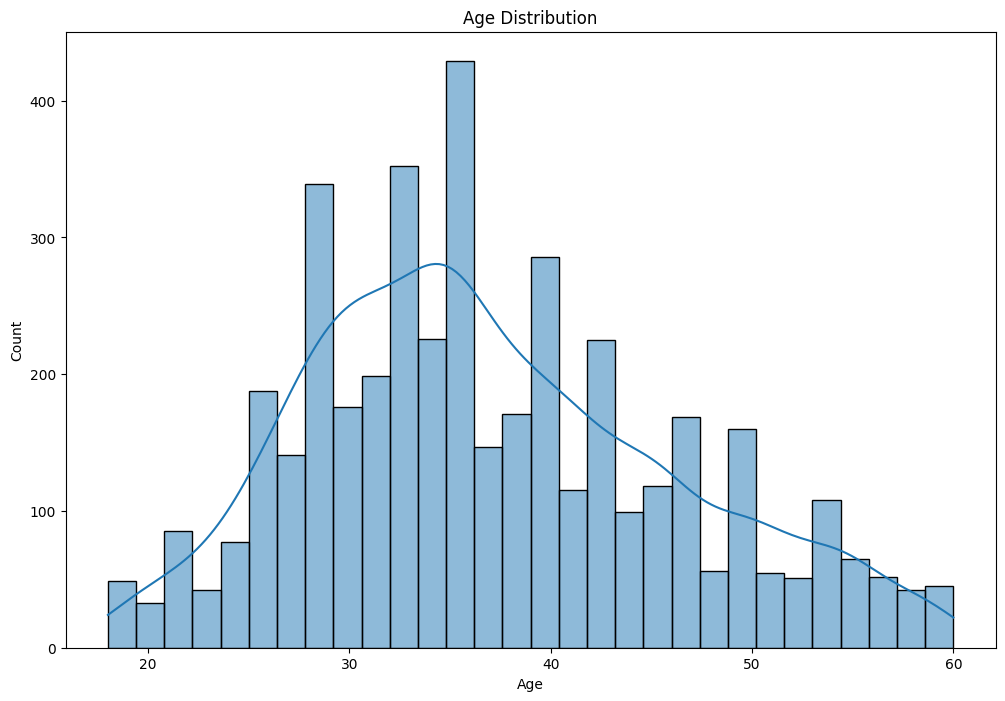

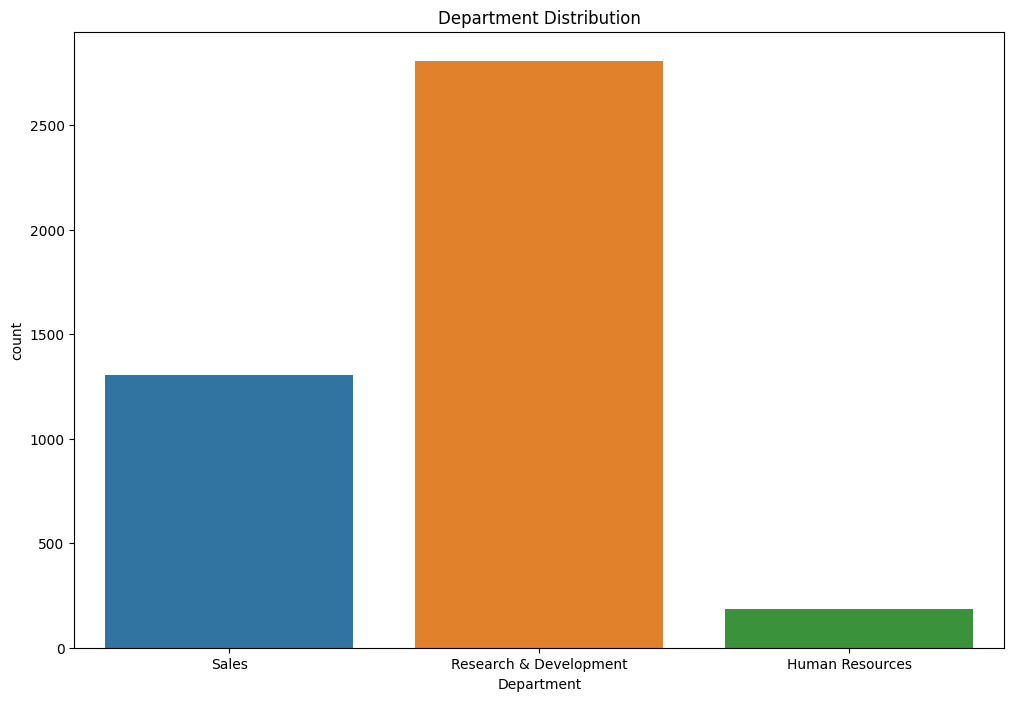

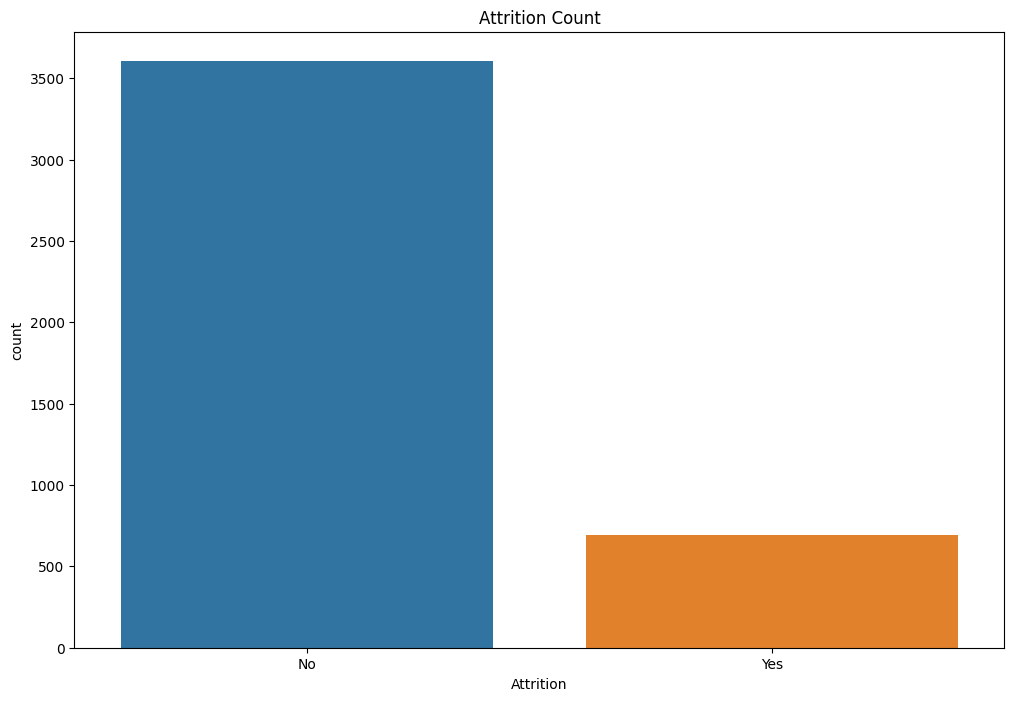

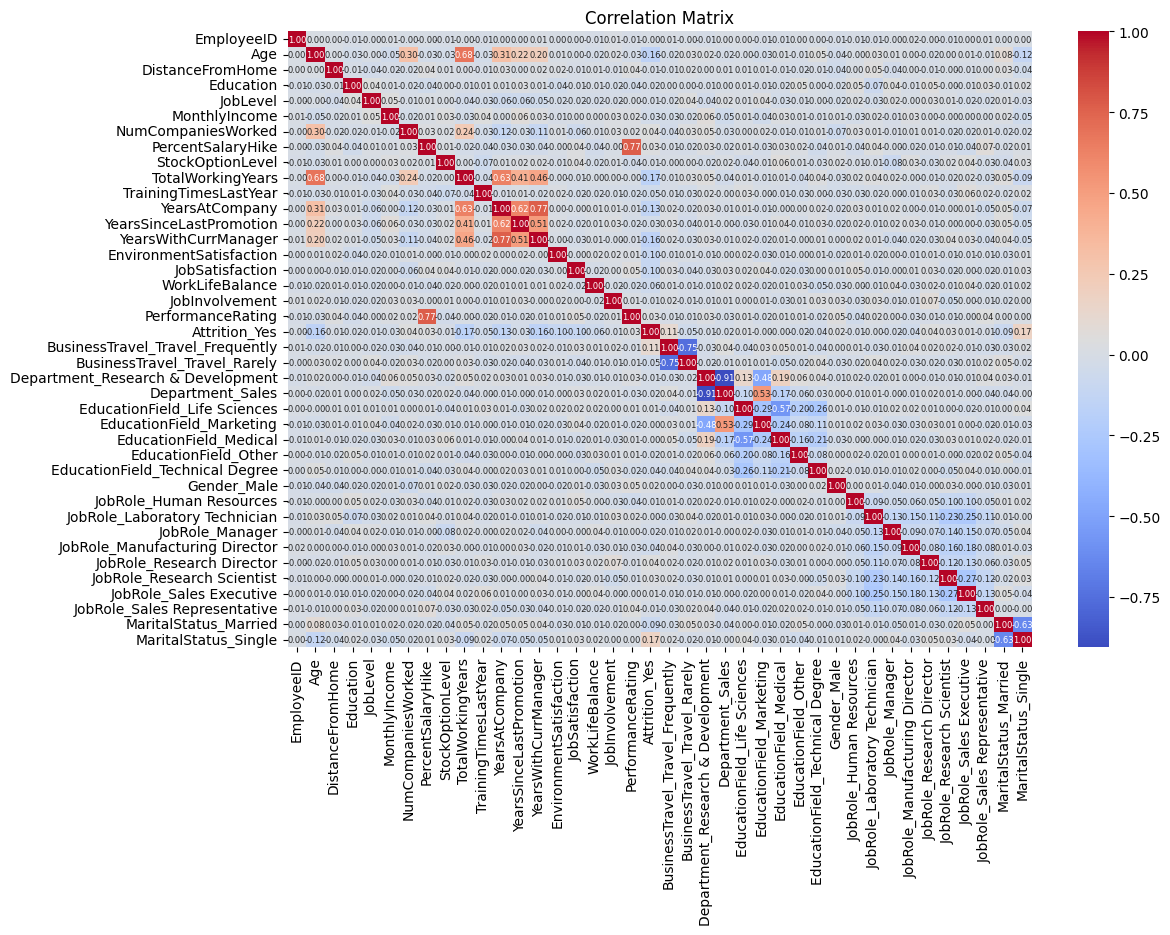

In [14]:
# Load Data
data = pd.read_csv('Attrition data.csv')

# Data Cleaning
# Drop columns with single unique value
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

# Handle missing values (if any)
data = data.dropna()

# Data Visualization before encoding
# Distribution of continuous variables
plt.figure(figsize=(12, 8))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Count plots for categorical variables
plt.figure(figsize=(12, 8))
sns.countplot(x='Department', data=data)
plt.title('Department Distribution')
plt.show()

# Attrition rates by various factors
plt.figure(figsize=(12, 8))
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Count')
plt.show()

# Convert categorical columns to numeric using one-hot encoding after visualization
data = pd.get_dummies(data, drop_first=True)

# Correlation Analysis
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 6})  # Change 'size' to your desired font size
plt.title('Correlation Matrix')
plt.show()


### Predictive Modelling

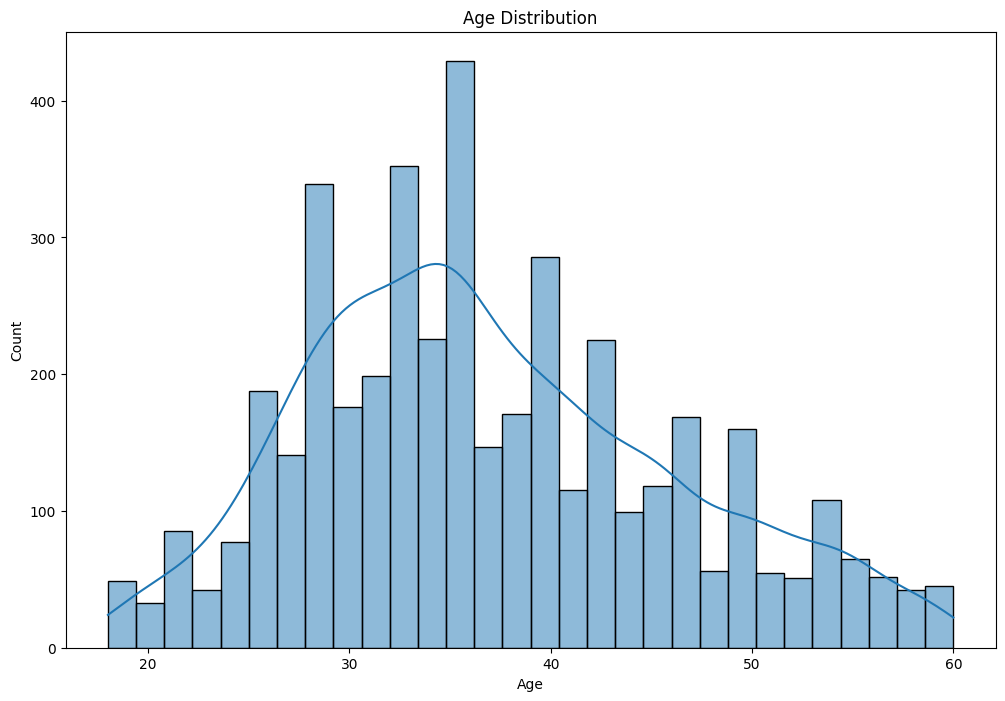

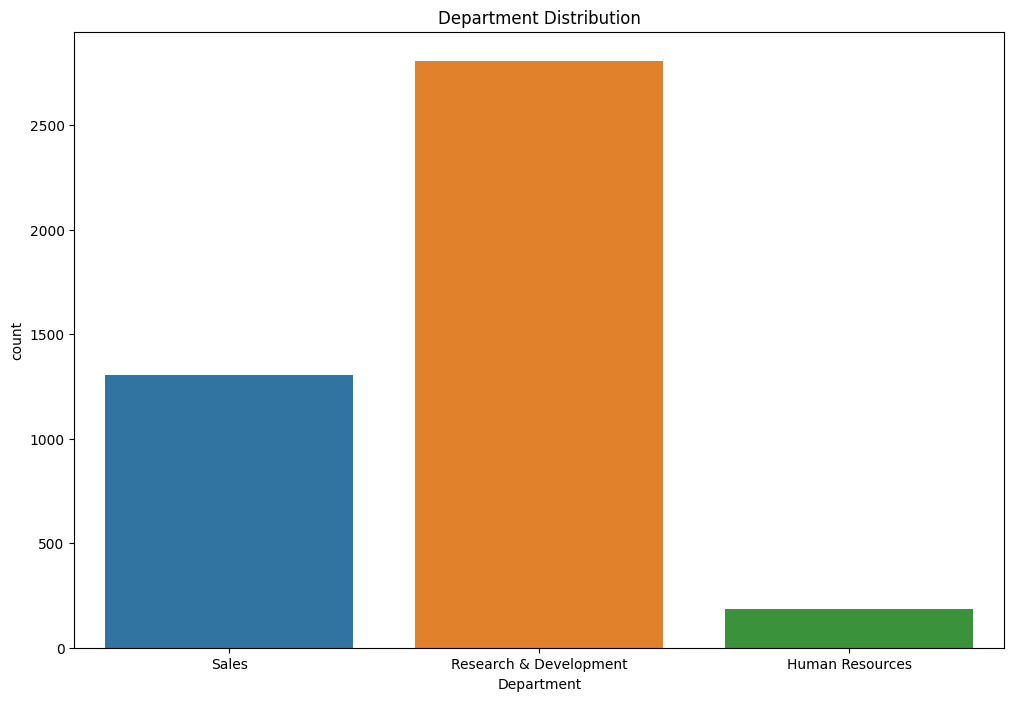

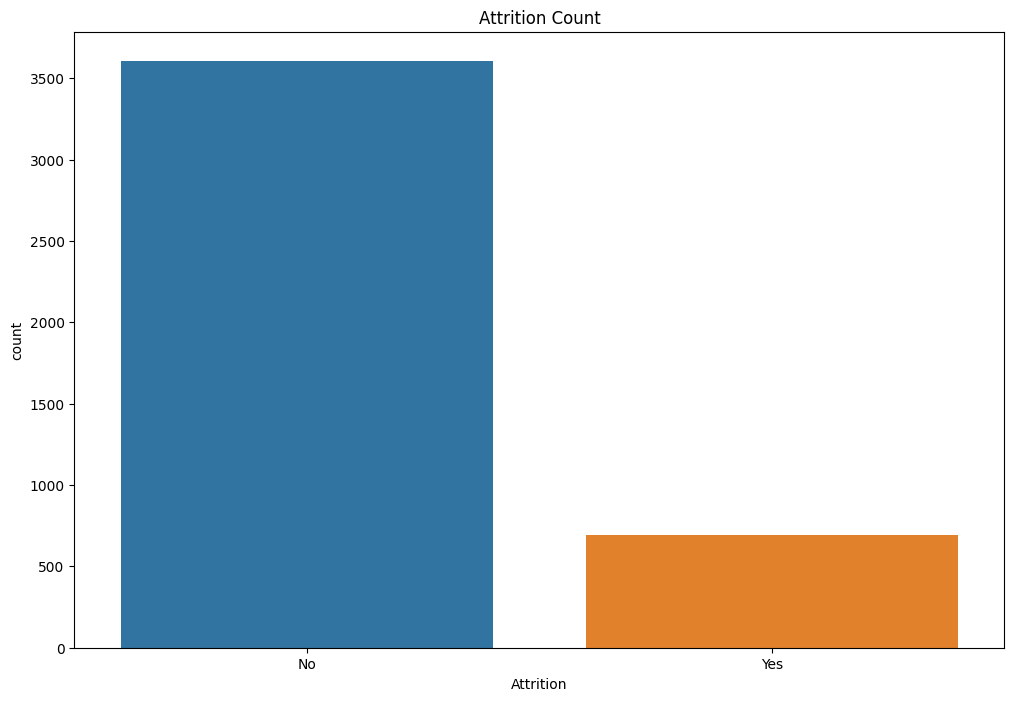

DecisionTreeClassifier(random_state=42)

In [5]:
# Load Data
data = pd.read_csv('Attrition data.csv')

# Data Cleaning
# Drop columns with single unique value
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

# Handle missing values (if any)
data = data.dropna()

# Data Visualization before encoding
# Distribution of continuous variables
plt.figure(figsize=(12, 8))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Count plots for categorical variables
plt.figure(figsize=(12, 8))
sns.countplot(x='Department', data=data)
plt.title('Department Distribution')
plt.show()

# Attrition rates by various factors
plt.figure(figsize=(12, 8))
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Count')
plt.show()

# Convert categorical columns to numeric using one-hot encoding after visualization
data = pd.get_dummies(data, drop_first=True)

# Data Splitting
X = data.drop('Attrition_Yes', axis=1)  # Use 'Attrition_Yes' which was created during one-hot encoding
y = data['Attrition_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection and Training
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)


### Evaluation of Models

In [6]:
# Evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Evaluate Decision Tree
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_tree):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tree):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))


Logistic Regression Metrics:
Accuracy: 0.85
Precision: 0.67
Recall: 0.13
F1 Score: 0.22
Confusion Matrix:
[[1067   14]
 [ 181   28]]
Decision Tree Metrics:
Accuracy: 0.96
Precision: 0.85
Recall: 0.92
F1 Score: 0.89
Confusion Matrix:
[[1047   34]
 [  16  193]]


### Feature Importance and Interpretation

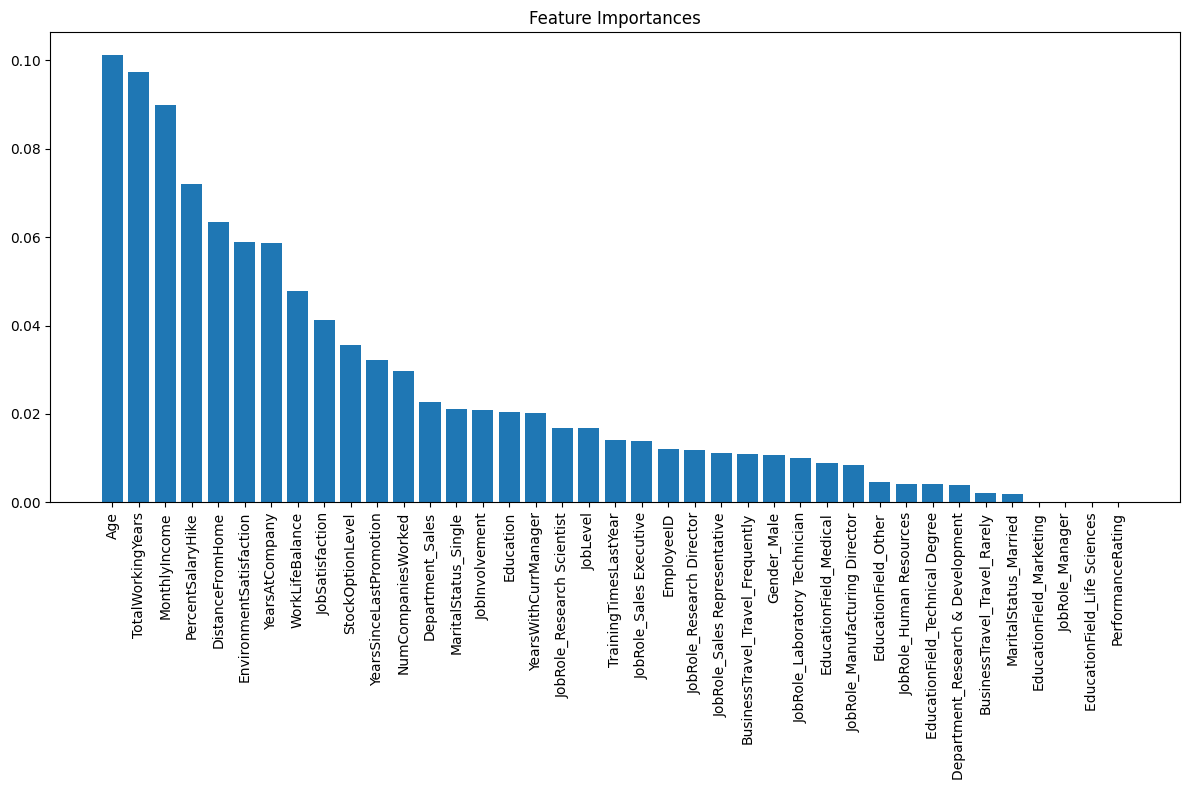

In [7]:
# Feature Importance for Decision Tree
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


### Logistic Regression Predictions 

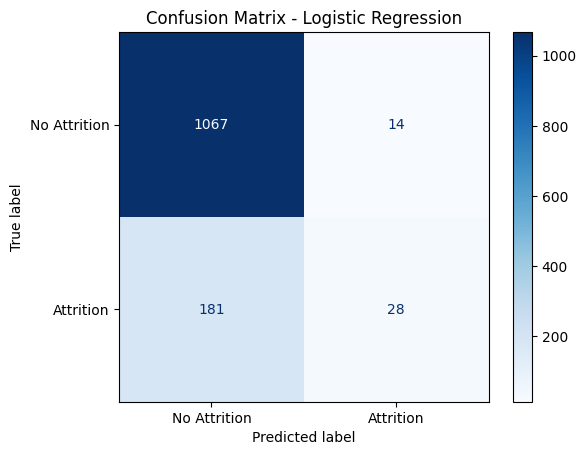

In [8]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred_log_reg = log_reg.predict(X_test)

# Compute confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['No Attrition', 'Attrition'])
disp_log_reg.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


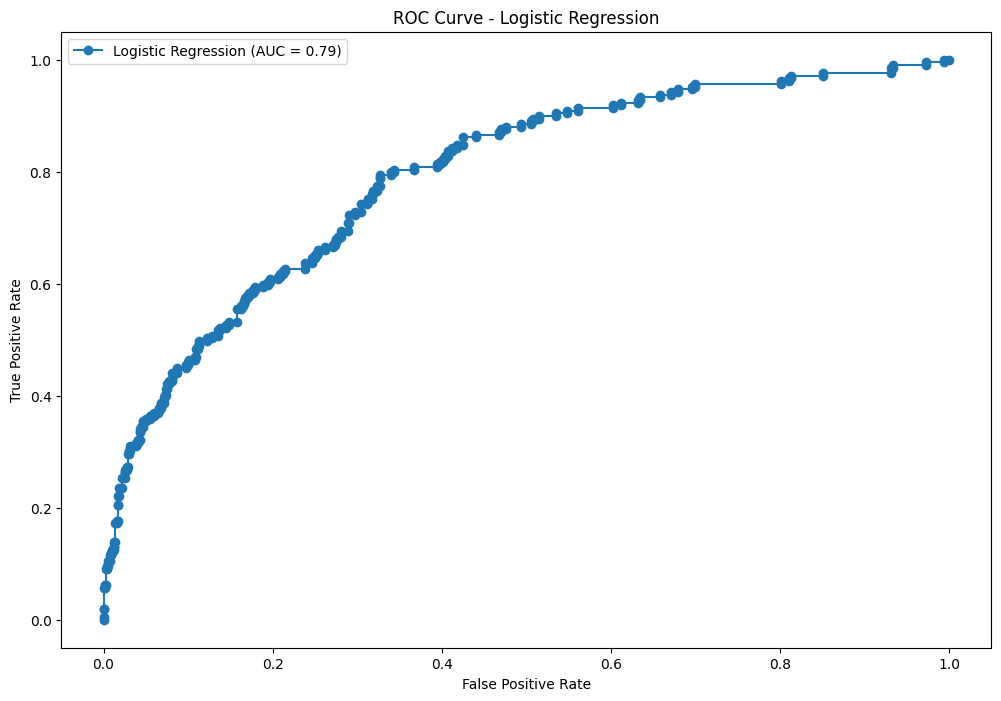

In [9]:
# ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
y_probs_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs_log_reg)
auc_log_reg = roc_auc_score(y_test, y_probs_log_reg)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, marker='o', label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


### Decision Tree Predictions

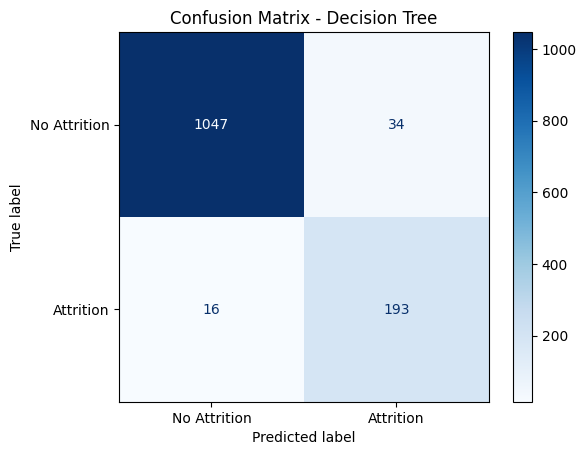

In [10]:
# Confusion Matrix

# Predict on test data
y_pred_tree = tree_clf.predict(X_test)

# Compute confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=['No Attrition', 'Attrition'])
disp_tree.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


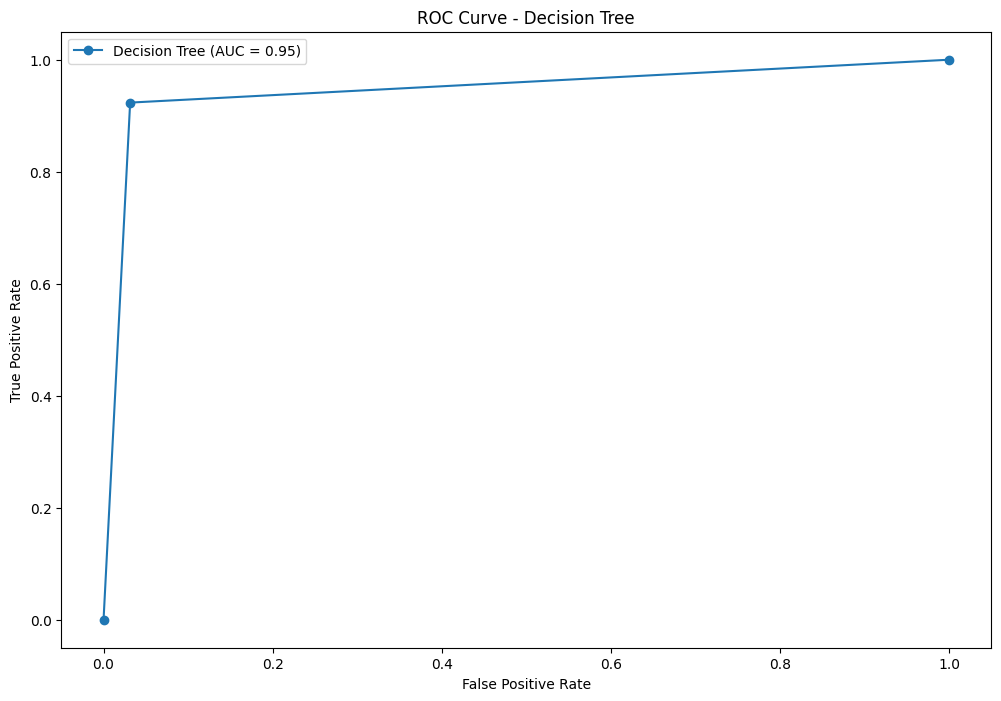

In [11]:
# ROC Curve

# Compute ROC curve
y_probs_tree = tree_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs_tree)
auc_tree = roc_auc_score(y_test, y_probs_tree)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, marker='o', label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


### Preparation for visualization

### Computing Performance Metrics

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict using the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

# Compute metrics for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Compute metrics for Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Print metrics to verify
print("Logistic Regression Metrics")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print(f"Precision: {precision_log_reg:.2f}")
print(f"Recall: {recall_log_reg:.2f}")
print(f"F1 Score: {f1_log_reg:.2f}")

print("\nDecision Tree Metrics")
print(f"Accuracy: {accuracy_tree:.2f}")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall: {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")


Logistic Regression Metrics
Accuracy: 0.85
Precision: 0.67
Recall: 0.13
F1 Score: 0.22

Decision Tree Metrics
Accuracy: 0.96
Precision: 0.85
Recall: 0.92
F1 Score: 0.89


## Creating Dashboard

## Preparation of data

In [13]:
import pandas as pd

# Load the data
data = pd.read_csv('Attrition data.csv')

# Drop unnecessary columns
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

# Handle missing values
data = data.dropna()

# Convert categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

data.to_csv('data.csv', index=False)